
# Notebook to run Gene set Enrichment analysis on CMC using ´GSEAPY´

Created by : Srivalli Kolla

Developed on : 22 November,2024

Last Modified : 22 November,2024

Institute of Systems Immunology, University of Wurzburg

GSEApy is a Python/Rust implementation of GSEA and wrapper for Enrichr

Tutorial : https://gseapy.readthedocs.io/en/latest/introduction.html#gseapy-gene-set-enrichment-analysis-in-python

Env : gseapy

# Import Packages

In [12]:
import datetime
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import scanpy as sc
import os

In [13]:
timestamp = datetime.datetime.now().strftime("%d_%m_%y,%H:%M")
timestamp

'22_11_24,14:55'

# Import data

In [14]:
cmc = sc.read_h5ad('../data/dmd_cmc_gene_set_scoring_added_22_11_24,09:57.h5ad')
cmc

AnnData object with n_obs × n_vars = 84691 × 29378
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'sample', 'seed_labels', 'genotype', 'doublet_scores', 'predicted_doublets', 'percent_chrY', 'XIST-counts', 'XIST-percentage', 'gender_check_cov', 'S_score', 'G2M_score', 'phase', 'C_scANVI', 'ref', 'interferon_score', 'apoptotic_s

# Analysis

## Set up

In [15]:
gene_list = cmc.var_names.tolist()
gene_list = [gene.upper() for gene in gene_list]
gene_list

['XKR4',
 'GM1992',
 'GM19938',
 'GM37381',
 'RP1',
 'SOX17',
 'GM37587',
 'GM37323',
 'MRPL15',
 'LYPLA1',
 'TCEA1',
 'RGS20',
 'GM16041',
 'ATP6V1H',
 'OPRK1',
 'NPBWR1',
 'RB1CC1',
 'ALKAL1',
 'ST18',
 'PCMTD1',
 'GM26901',
 'GM30414',
 'SNTG1',
 'RRS1',
 'ADHFE1',
 'VXN',
 'GM29520',
 'MYBL1',
 'VCPIP1',
 'SGK3',
 'MCMDC2',
 'SNHG6',
 'TCF24',
 'PPP1R42',
 'GM15818',
 'COPS5',
 'CSPP1',
 'ARFGEF1',
 'CPA6',
 'PREX2',
 'GM17644',
 'GM29663',
 'SULF1',
 'SLCO5A1',
 'GM29283',
 'PRDM14',
 'NCOA2',
 'GM29570',
 'TRAM1',
 'LACTB2',
 'XKR9',
 'EYA1',
 'GM9947',
 'MSC',
 'TRPA1',
 'KCNB2',
 'TERF1',
 'SBSPON',
 'RPL7',
 'RDH10',
 'GM28095',
 'STAU2',
 'GM7568',
 'UBE2W',
 'ELOC',
 'TMEM70',
 'LY96',
 'GM28376',
 'JPH1',
 'GM28783',
 'GDAP1',
 'GM28784',
 'PI15',
 'GM28154',
 'GM16070',
 'CRISPLD1',
 'GM28153',
 'GM28756',
 'CRISP4',
 'DEFB18',
 'DEFB41',
 'GM15825',
 'TFAP2D',
 'TFAP2B',
 'GM28340',
 'PKHD1',
 'GM28653',
 'IL17A',
 'IL17F',
 'MCM3',
 'GM28065',
 'PAQR8',
 'EFHC1',
 'TRAM2

In [16]:
# Define the gene sets
gene_sets = {
    'Interferon_Gamma': [
        'Stat1', 'Ifng', 'Jak1', 'Tyk2', 'Tp53', 'Ifngr1', 'Irf1', 'Jak2', 'Ifngr2', 'Hpx'
    ],
    'Apoptosis_GSEA': [
        'Add1', 'Aifm3', 'Ankh', 'Anxa1', 'App', 'Atf3', 'Avpr1A', 'Bax', 'Bcap31', 'Bcl10', 'Bcl2L1', 'Bcl2L10',
        'Bcl2L11', 'Bcl2L2', 'Bgn', 'Bid', 'Bik', 'Birc3', 'Bmf', 'Bmp2', 'Bnip3L', 'Brca1', 'Btg2', 'Btg3', 'Casp1',
        'Casp2', 'Casp3', 'Casp4', 'Casp6', 'Casp7', 'Casp8', 'Casp9', 'Cav1', 'Ccna1', 'Ccnd1', 'Ccnd2', 'Cd14', 'Cd2',
        'Cd38', 'Cd44', 'Cd69', 'Cdc25B', 'Cdk2', 'Cdkn1A', 'Cdkn1B', 'Cflar', 'Clu', 'Crebbp', 'Cth', 'Ctnnb1', 'Cyld',
        'Dap', 'Dap3', 'Dcn', 'Ddit3', 'Dffa', 'Diablo', 'Dnaja1', 'Dnajc3', 'Dnm1L', 'Dpyd', 'Ebp', 'Egr3', 'Emp1',
        'Eno2', 'Erbb2', 'Erbb3', 'Ereg', 'Etf1', 'F2', 'F2R', 'Fas', 'Faslg', 'Fdxr', 'Fez1', 'Gadd45A', 'Gadd45B',
        'Gch1', 'Gna15', 'Gpx1', 'Gpx3', 'Gpx4', 'Gsn', 'Gsr', 'Gstm1', 'Gucy2D', 'H1-0', 'Hgf', 'Hmgb2', 'Hmox1',
        'Hspb1', 'Ier3', 'Ifitm3', 'Ifnb1', 'Ifngr1', 'Igf2R', 'Igfbp6', 'Il18', 'Il1A', 'Il1B', 'Il6', 'Irf1', 'Isg20',
        'Jun', 'Krt18', 'Lef1', 'Lgals3', 'Lmna', 'Plppr4', 'Lum', 'Madd', 'Mcl1', 'Mgmt', 'Mmp2', 'Nedd9', 'Nefh', 'Pak1',
        'Pdcd4', 'Pdgfrb', 'Pea15', 'Plat', 'Plcb2', 'Pmaip1', 'Ppp2R5B', 'Ppp3R1', 'Ppt1', 'Prf1', 'Psen1', 'Psen2',
        'Ptk2', 'Rara', 'Rela', 'Retsat', 'Rhob', 'Rhot2', 'Rnasel', 'Rock1', 'Sat1', 'Satb1', 'Sc5D', 'Slc20A1', 'Smad7',
        'Sod1', 'Sod2', 'Sptan1', 'Sqstm1', 'Tap1', 'Tgfb2', 'Tgfbr3', 'Timp1', 'Timp2', 'Timp3', 'Tnf', 'Tnfrsf12A',
        'Tnfsf10', 'Top2A', 'Tspo', 'Txnip', 'Vdac2', 'Wee1', 'Xiap'
    ],
    'Interferon_Alpha_GSEA': [
        'Adar', 'B2M', 'Batf2', 'Bst2', 'C1S', 'Casp1', 'Casp8', 'Ccrl2', 'Cd47', 'Cd74', 'Cmpk2', 'Cnp', 'Csf1', 'Cxcl10',
        'Cxcl11', 'Ddx60', 'Dhx58', 'Eif2Ak2', 'Elf1', 'Epsti1', 'Mvb12A', 'Tent5A', 'Cmtr1', 'Gbp2', 'Gbp4', 'Gmpr',
        'Herc6', 'Hla-C', 'Ifi27', 'Ifi30', 'Ifi35', 'Ifi44', 'Ifi44L', 'Ifih1', 'Ifit2', 'Ifit3', 'Ifitm1', 'Ifitm2',
        'Ifitm3', 'Il15', 'Il4R', 'Il7', 'Irf1', 'Irf2', 'Irf7', 'Irf9', 'Isg15', 'Isg20', 'Lamp3', 'Lap3', 'Lgals3Bp',
        'Lpar6', 'Ly6E', 'Mov10', 'Mx1', 'Ncoa7', 'Nmi', 'Nub1', 'Oas1', 'Oasl', 'Ogfr', 'Parp12', 'Parp14', 'Parp9',
        'Plscr1', 'Pnpt1', 'Helz2', 'Procr', 'Psma3', 'Psmb8', 'Psmb9', 'Psme1', 'Psme2', 'Ripk2', 'Rnf31', 'Rsad2', 'Rtp4',
        'Samd9', 'Samd9L', 'Sell', 'Slc25A28', 'Sp110', 'Stat2', 'Tap1', 'Tdrd7', 'Tmem140', 'Trafd1', 'Trim14', 'Trim21',
        'Trim25', 'Trim26', 'Trim5', 'Txnip', 'Uba7', 'Ube2L6', 'Usp18', 'Wars1'
    ],
    'Interferon_Gamma_GSEA': [
        'Adar', 'Apol6', 'Arid5B', 'Arl4A', 'Auts2', 'B2M', 'Bank1', 'Batf2', 'Bpgm', 'Bst2', 'Btg1', 'C1R', 'C1S', 'Casp1',
        'Casp3', 'Casp4', 'Casp7', 'Casp8', 'Ccl2', 'Ccl5', 'Ccl7', 'Cd274', 'Cd38', 'Cd40', 'Cd69', 'Cd74', 'Cd86', 'Cdkn1A',
        'Cfb', 'Cfh', 'Ciita', 'Cmklr1', 'Cmpk2', 'Csf2Rb', 'Cxcl10', 'Cxcl11', 'Cxcl9', 'Rigi', 'Ddx60', 'Dhx58', 'Eif2Ak2',
        'Eif4E3', 'Epsti1', 'Fas', 'Fcgr1A', 'Fgl2', 'Fpr1', 'Cmtr1', 'Gbp4', 'Gbp6', 'Gch1', 'Gpr18', 'Gzma', 'Herc6', 'Hif1A',
        'Hla-A', 'Hla-B', 'Hla-Dma', 'Hla-Dqa1', 'Hla-Drb1', 'Hla-G', 'Icam1', 'Ido1', 'Ifi27', 'Ifi30', 'Ifi35', 'Ifi44',
        'Ifi44L', 'Ifih1', 'Ifit1', 'Ifit2', 'Ifit3', 'Ifitm2', 'Ifitm3', 'Ifnar2', 'Il10Ra', 'Il15', 'Il15Ra', 'Il18Bp',
        'Il2Rb', 'Il4R', 'Il6', 'Il7', 'Irf1', 'Irf2', 'Irf4', 'Irf5', 'Irf7', 'Irf8', 'Irf9', 'Isg15', 'Isg20', 'Isoc1',
        'Itgb7', 'Jak2', 'Klrk1', 'Lap3', 'Lats2', 'Lcp2', 'Lgals3Bp', 'Ly6E', 'Lysmd2', 'Marchf1', 'Tmt1B', 'Mt2A', 'Mthfd2',
        'Mvp', 'Mx1', 'Mx2', 'Myd88', 'Nampt', 'Ncoa3', 'Nfkb1', 'Nfkbia', 'Nlrc5', 'Nmi', 'Nod1', 'Nup93', 'Oas2', 'Oas3',
        'Oasl', 'Ogfr', 'P2rx1', 'Parp9', 'Pgr1', 'Plscr1', 'Plxna1', 'Pnpt1', 'Rnf41', 'Sema3A', 'Tlr3', 'Trim5', 'Trim9',
        'Trim14', 'Tyk2', 'Uba7', 'Ube2L6', 'Usp18', 'Vdr'
    ],
    'Apoptosis': [
        'Add1', 'Aifm3', 'Ankh', 'Anxa1', 'App', 'Atf3', 'Avpr1A', 'Bax', 'Bcap31', 'Bcl10', 'Bcl2L1',
        'Bcl2L10', 'Bcl2L11', 'Bcl2L2', 'Bgn', 'Bid', 'Bik', 'Birc3', 'Bmf', 'Bmp2', 'Bnip3L', 'Brca1',
        'Btg2', 'Btg3', 'Casp1', 'Casp2', 'Casp3', 'Casp4', 'Casp6', 'Casp7', 'Casp8', 'Casp9', 'Cav1',
        'Ccna1', 'Ccnd1', 'Ccnd2', 'Cd14', 'Cd2', 'Cd38', 'Cd44', 'Cd69', 'Cdc25B', 'Cdk2', 'Cdkn1A',
        'Cdkn1B', 'Cflar', 'Clu', 'Crebbp', 'Cth', 'Ctnnb1', 'Cyld', 'Dap', 'Dap3', 'Dcn', 'Ddit3', 'Dffa',
        'Diablo', 'Dnaja1', 'Dnajc3', 'Dnm1L', 'Dpyd', 'Ebp', 'Egr3', 'Emp1', 'Eno2', 'Erbb2', 'Erbb3',
        'Ereg', 'Etf1', 'F2', 'F2R', 'Fas', 'Faslg', 'Fdxr', 'Fez1', 'Gadd45A', 'Gadd45B', 'Gch1', 'Gna15',
        'Gpx1', 'Gpx3', 'Gpx4', 'Gsn', 'Gsr', 'Gstm1', 'Gucy2D', 'H1-0', 'Hgf', 'Hmgb2', 'Hmox1', 'Hspb1',
        'Ier3', 'Ifitm3', 'Ifnb1', 'Ifngr1', 'Igf2R', 'Igfbp6', 'Il18', 'Il1A', 'Il1B', 'Il6', 'Irf1',
        'Isg20', 'Jun', 'Krt18', 'Lef1', 'Lgals3', 'Lmna', 'Plppr4', 'Lum', 'Madd', 'Mcl1', 'Mgmt', 'Mmp2',
        'Nedd9', 'Nefh', 'Pak1', 'Pdcd4', 'Pdgfrb', 'Pea15', 'Plat', 'Plcb2', 'Pmaip1', 'Ppp2R5B', 'Ppp3R1',
        'Ppt1', 'Prf1', 'Psen1', 'Psen2', 'Ptk2', 'Rara', 'Rela', 'Retsat', 'Rhob', 'Rhot2', 'Rnasel',
        'Rock1', 'Sat1', 'Satb1', 'Sc5D', 'Slc20A1', 'Smad7', 'Sod1', 'Sod2', 'Sptan1', 'Sqstm1', 'Tap1',
        'Tgfb2', 'Tgfbr3', 'Timp1', 'Timp2', 'Timp3', 'Tnf', 'Tnfrsf12A', 'Tnfsf10', 'Top2A', 'Tspo',
        'Txnip', 'Vdac2', 'Wee1', 'Xiap'
    ],
    'Oxidative Phosphorylation': [
        'ND5', 'CYTB', 'ND4', 'ND2', 'COX2', 'ND4L', 'COX1', 'COX3', 'COXI', 'Ndufa7', 'Ndufs1', 'COI',
        'Cox5b', 'COXII', 'COXIII', 'Ndufa12', 'Ndufc2', 'Cox7a1', 'Ndufa8', 'Ndufs6', 'Cox8a', 'Sdhaf2',
        'Ndufb6', 'Cox4i1', 'Cox8c', 'Proca1', 'Cox7c', 'Co3', 'C0JZQ9', 'C0JZR0', 'Cox7a2l', 'Atp5e',
        'Tafazzin', 'Uqcrq', 'Dld', 'Ndufb11', 'Ndufa1', 'Fxn', 'Snca', 'Mt-Cyb', 'Mtco1', 'mt-Co3', 'Mtatp6',
        'Mtnd1', 'mt-Nd2', 'mt-Nd3', 'Mtnd4l', 'Mtnd4', 'Mtnd5', 'Mtnd6', 'Ndufb1', 'Cox5a', 'Cox6a2', 'Cox6a1',
        'Msh2', 'Cox7a2', 'Cox8b', 'Atp5mf', 'Atp5f1e', 'Cox6b1', 'Cox7b', 'Atp5f1b', 'Bid', 'Atp5pf',
        'Coq7', 'Uqcrh', 'Atp5f1a', 'Atp5me', 'mt-Co1', 'Q3TRR5', 'Atp5f1c', 'Uqcr11', 'mt-Nd4', 'Q3UQ68',
        'Q3UR21', 'Q3UVI0', 'Uqcc3', 'Afg1l', 'Atp5f1d', 'mt-Nd1', 'Q5BP84', 'Q5BP85', 'Slc25a51', 'Atp5pb',
        'Ndufs8', 'Uqcr10', 'Tefm', 'mt-Nd6', 'Q6TM11', 'Q6TM12', 'Q71EJ0', 'Dnajc15', 'Mtch2', 'ATP6',
        'Nipsnap2', 'Chchd10', 'Cox6b2', 'Coa6', 'Ndufv3', 'Coq9', 'Sdha', 'Cox4i2', 'Ndufs2', 'Ndufv1',
        'Stoml2', 'Ndufa10', 'Ndufs5', 'Ndufa5', 'Cox6c', 'Ndufb2', 'Ndufa2', 'Ndufa3', 'Sdhb', 'Uqcrb',
        'Ndufb4', 'Ndufb5', 'Ndufb9', 'Ndufc1', 'Ndufa6', 'Ndufb3', 'Ndufab1', 'Ndufb7', 'Sdhd', 'Ndufs4',
        'Uqcrc1', 'Sdhc', 'Cyc1', 'Cox7b2', 'Ndufb8', 'Ndufv2', 'Cox5b-ps', 'Ndufa11', 'Q9D9H8', 'Atp5po',
        'Uqcrc2', 'Ndufa9', 'Ndufs7', 'Ndufb10', 'Ndufs3', 'Atp5pd', 'Ndufa13', 'mt-Nd4l', 'mt-Nd5',
        'nadh_ubq_oxred_mouse', 'succinate_dh_mouse', 'ubol_cytc_mouse', 'Mus musculus (house mouse) microRNA mmu-mir-451a precursor',
        'Mus musculus (house mouse) microRNA mmu-mir-451b precursor'
    ],
        'ferroptosis': [
        'Ninj1', 'Tp53', 'Hmox1', 'Gpx4', 'Slc7a11', 'Acsl4', 'Tfrc', 
        'Fth1', 'Ftl', 'Ncoa4', 'Lpcat3', 'Alox15', 'Ptgs2', 'Nfe2l2', 
        'Cisd1', 'Sat1', 'Rsl', 'Gls2', 'Dpp4'
    ],
    'glycolysis': [
        'Pgam2', 'Aldoa', 'Gpi', 'Pgk1', 'Gapdh', 'Eno1', 'Hk1', 'Tpi1', 
        'Eno3', 'Foxk1', 'Pfkm', 'Pkm', 'Pgam1', 'Foxk2'
    ],
    'pyroptosis': [
        'Gsdmd', 'Ninj1', 'Gzma', 'Casp4', 'Gsdme'
    ],
    'fatty_acid_metabolism': [
        'Hsd17b8', 'Gcdh', 'Acad9', 'Elovl6', 'Lias', 'Acox3', 'Alox5', 
        'Acadl', 'Acad11', 'Acad8', 'Adtrp', 'Elovl2', 'Fasn', 'Fads3', 
        'Cyp2e1', 'Cpt1c', 'Acsf3', 'Ilvbl', 'Gm49366', 'Acot3', 'Elovl7', 
        'Mcat', 'Prkag1', 'Decr2', 'Fads1', 'Cpt1a', 'Scd2', 'Elovl3', 'Tnxb', 
        'Tecr', 'Acox1', 'Cpt2', 'Cyp4a12b', 'Hsd17b10', 'Acnat1', 'Hacd4', 
        'Hacd1', 'Acss2', 'Acot11', 'Alox12', 'Alox15', 'Acot12', 'Cryl1', 
        'Acsl6', 'Acadvl', 'Alox8', 'Aldh3a2', 'Cyp4v3', 'Acot6', 'Crat', 
        'Prkag2', 'Hacl1', 'Pccb', 'Acsl1', 'Elovl5', 'Ptges3', 'Acad12', 
        'Ptgr2', 'Prkag3', 'Acsl3', 'Gm20431', 'Acot7', 'Acacb', 'Cyp2c23', 
        'Acadsb', 'Acox2', 'Slc27a6', 'Pnpla3', 'Fads2', 'Tnfrsf1a', 'Tbxas1', 
        'Ndufab1', 'Ech1', 'Bdh2', 'Slc27a3', 'Naaa', 'Aloxe3', 'Faah', 'Degs1', 
        'Pex5', 'Ptgds', 'Amacr', 'Ptgis', 'Aoah', 'Phyh', 'Slc27a2', 'Mgll', 
        'Cyp4a14', 'Per2', 'Snca', 'Acot1', 'Gpx4', 'Hsd17b12', 'Slc25a17', 
        'Alox12b', 'Comt', 'Cyp4a10', 'Cyp1a1', 'Cyp1a2', 'C3', 'Cd74', 'Enpp1', 
        'Tyrp1', 'Gstm1', 'Lpl', 'Gpx1', 'Nudt19'
    ],
        't_cell_mediated_cytotoxicity': [
        'H2-Ea', 'H2-T27', 'Slc22a13', 'Nckap1l', 'H2-Q6', 'H2-Q7', 'H2-M10.3', 'Ager', 
        'Rab27a', 'B2m', 'Cd1d1', 'Cd1d2', 'Ctsc', 'Ctsh', 'Emp2', 'Muc4', 'Fadd', 'Gzmb',
        'H2-Bl', 'H2-D1', 'H2-K1', 'H2-M10.1', 'H2-M2', 'H2-M3', 'H2-M9', 'H2-Q1', 'H2-Q10',
        'H2-Q2', 'H2-Q4', 'H2-Q7', 'H2-T10', 'H2-T22', 'H2-T23', 'H2-T24', 'H2-T3', 'Mr1', 
        'Hfe', 'Hprt1', 'Il12a', 'Il12b', 'Il7r', 'Klrd1', 'Gzmm', 'P2rx7', 'Prf1', 'Pnp', 
        'Ppp3cb', 'Ptprc', 'Nectin2', 'Raet1d', 'Serpinb9b', 'Serpinb9', 'Tap2', 'Gfus', 'Cyrib', 
        'H2-M10.4', 'H2-M11', 'H2-M1', 'H2-M10.5', 'H2-M5', 'Mill2', 'Mill1', 'H2-M10.2', 'Raet1e', 
        'H2-M10.6', 'Pvr', 'Stx7', 'Ebag9', 'Ripk3', 'Raet1d', 'H60b', 'H2-T26', 'H60c', 'Stx11', 
        '2410137M14Rik', 'Ulbp1', 'Il23a'
    ],
    'ros_pathway': [
        'Abcc1', 'Atox1', 'Cat', 'Cdkn2D', 'Egln2', 'Ercc2', 'Fes', 'Ftl', 'G6Pd', 'Gclc', 'Gclm', 
        'Glrx', 'Glrx2', 'Gpx3', 'Gpx4', 'Gsr', 'Lamtor5', 'Hhex', 'Hmox2', 'Ipcef1', 'Junb', 'Lsp1',
        'Mbp', 'Mgst1', 'Mpo', 'Msra', 'Ndufa6', 'Ndufb4', 'Ndufs2', 'Nqo1', 'Oxsr1', 'Pdlim1', 'Pfkp', 
        'Ptpa', 'Prdx1', 'Prdx2', 'Prdx4', 'Prdx6', 'Prnp', 'Sbno2', 'Scaf4', 'Selenos', 'Sod1', 'Sod2', 
        'Srxn1', 'Stk25', 'Txn', 'Txnrd1', 'Txnrd2'
    ],
    'sting_mediated': [
        'Mre11', 'Xrcc5', 'Dtx4', 'Irf3', 'Trim21', 'Nlrp4', 'Ifi16', 'Cgas', 'Stat6', 
        'Nlrc3', 'Ddx41', 'Tbk1', 'Sting1', 'Xrcc6', 'Trex1', 'Prkdc', 'Sting1'
    ],
    'cytosolic_dna_sensing': [
        'Adar', 'Polr3F', 'Polr3G', 'Polr3C', 'Ripk3', 'Polr3A', 'Trex1', 'Chuk', 'Polr3H',
        'Rigi', 'Pycard', 'Tbk1', 'Sting1', 'Ifna1', 'Ifna2', 'Ifna4', 'Ifna5', 'Ifna6', 'Ifna7',
        'Ifna8', 'Ifna10', 'Ifna13', 'Ifna14', 'Ifna16', 'Ifna17', 'Ifna21', 'Ifnb1', 'Ikbkb',
        'Il1B', 'Il6', 'Il18', 'Cxcl10', 'Irf3', 'Irf7', 'Ccl4L2', 'Nfkb1', 'Nfkbia', 'Nfkbib',
        'Polr1D', 'Polr3K', 'Polr3B', 'Mavs', 'Rela', 'Ccl4', 'Ccl5', 'Polr3D', 'Zbp1', 'Casp1',
        'Polr3Gl', 'Ikbkg', 'Ripk1', 'Il33', 'Aim2', 'Polr1C', 'Ccl4L2', 'Ikbke'
    ]

}

# Create and write to .gmt file
with open('../gene_set_enrichment/results/gene_sets.gmt', 'w') as file:
    for gene_set, genes in gene_sets.items():
        file.write(f"{gene_set}\t" + '\t'.join(genes) + '\n')

In [17]:
libraries = gp.get_library_name(organism= 'Mouse')
libraries

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

To check databases available : https://maayanlab.cloud/Enrichr/#libraries

In [18]:
gene_list

['XKR4',
 'GM1992',
 'GM19938',
 'GM37381',
 'RP1',
 'SOX17',
 'GM37587',
 'GM37323',
 'MRPL15',
 'LYPLA1',
 'TCEA1',
 'RGS20',
 'GM16041',
 'ATP6V1H',
 'OPRK1',
 'NPBWR1',
 'RB1CC1',
 'ALKAL1',
 'ST18',
 'PCMTD1',
 'GM26901',
 'GM30414',
 'SNTG1',
 'RRS1',
 'ADHFE1',
 'VXN',
 'GM29520',
 'MYBL1',
 'VCPIP1',
 'SGK3',
 'MCMDC2',
 'SNHG6',
 'TCF24',
 'PPP1R42',
 'GM15818',
 'COPS5',
 'CSPP1',
 'ARFGEF1',
 'CPA6',
 'PREX2',
 'GM17644',
 'GM29663',
 'SULF1',
 'SLCO5A1',
 'GM29283',
 'PRDM14',
 'NCOA2',
 'GM29570',
 'TRAM1',
 'LACTB2',
 'XKR9',
 'EYA1',
 'GM9947',
 'MSC',
 'TRPA1',
 'KCNB2',
 'TERF1',
 'SBSPON',
 'RPL7',
 'RDH10',
 'GM28095',
 'STAU2',
 'GM7568',
 'UBE2W',
 'ELOC',
 'TMEM70',
 'LY96',
 'GM28376',
 'JPH1',
 'GM28783',
 'GDAP1',
 'GM28784',
 'PI15',
 'GM28154',
 'GM16070',
 'CRISPLD1',
 'GM28153',
 'GM28756',
 'CRISP4',
 'DEFB18',
 'DEFB41',
 'GM15825',
 'TFAP2D',
 'TFAP2B',
 'GM28340',
 'PKHD1',
 'GM28653',
 'IL17A',
 'IL17F',
 'MCM3',
 'GM28065',
 'PAQR8',
 'EFHC1',
 'TRAM2

## Wt vs Mdx

In [21]:
cmc.var_names = cmc.var_names.str.upper()

In [22]:
cmc_subset = cmc[cmc.obs['genotype'].isin(['WT', 'Mdx'])]
cmc = cmc[~cmc.obs['genotype'].isnull()] 
cmc_subset

View of AnnData object with n_obs × n_vars = 59691 × 29378
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'sample', 'seed_labels', 'genotype', 'doublet_scores', 'predicted_doublets', 'percent_chrY', 'XIST-counts', 'XIST-percentage', 'gender_check_cov', 'S_score', 'G2M_score', 'phase', 'C_scANVI', 'ref', 'interferon_score', 'apo

In [ ]:
# Check the first few gene sets
reactome_gene_sets = gp.get_gene_sets("Reactome_2022")
print(reactome_gene_sets.keys())  # Show available gene sets
print(reactome_gene_sets['Reactome_2022'][:5])  # Print the first few gene sets

In [23]:
res = gp.gsea(
    data=cmc_subset.to_df().T,  
    gene_sets="Reactome_2022",
    cls=cmc_subset.obs['genotype'],
    outdir=None,
    method='s2n',  
    threads=16
)

/home/skolla/miniforge3/envs/gseapy/lib/python3.12/site-packages/gseapy/gsea.py:120: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df_std.abs().sum(axis=1) > 0]


In [25]:
res.res2d.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Selenoamino Acid Metabolism R-HSA-2408522,0.887948,3.574167,0.0,0.0,0.0,73/99,1.35%,RPS29;RPLP1;RPL23;RPL41;RPS8;RPLP2;RPL37A;RPS1...
1,gsea,SRP-dependent Cotranslational Protein Targetin...,0.902975,3.527948,0.0,0.0,0.0,76/101,1.55%,RPS29;RPLP1;RPL23;RPL41;RPS8;RPLP2;RPL37A;RPS1...
2,gsea,Formation Of A Pool Of Free 40S Subunits R-HSA...,0.943819,3.510683,0.0,0.0,0.0,76/92,1.99%,RPS29;RPLP1;RPL23;RPL41;RPS8;RPLP2;RPL37A;RPS1...
3,gsea,L13a-mediated Translational Silencing Of Cerul...,0.898644,3.500453,0.0,0.0,0.0,76/101,1.99%,RPS29;RPLP1;RPL23;RPL41;RPS8;RPLP2;RPL37A;RPS1...
4,gsea,Eukaryotic Translation Elongation R-HSA-156842,0.969432,3.481495,0.0,0.0,0.0,76/85,1.39%,RPS29;RPLP1;RPL23;RPL41;RPS8;RPLP2;RPL37A;RPS1...


In [44]:
top_terms = res.res2d.sort_values(by='Gene %', ascending=False).head(10)
top_terms

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
936,gsea,Amyloid Fiber Formation R-HSA-977225,0.393671,1.546542,0.022312,0.051494,0.967,42/42,99.98%,GSN;NPPA;CST3;APOE;RPS27A;UBB;B2M;ITM2B;PSENEN...
970,gsea,Binding And Uptake Of Ligands By Scavenger Rec...,0.386324,1.42472,0.058288,0.111667,0.999,34/34,99.47%,FTH1;APOE;COL3A1;HSP90AA1;SPARC;COL1A2;COL1A1;...
1054,gsea,Triglyceride Catabolism R-HSA-163560,0.342381,1.183796,0.254647,0.313965,1.0,20/20,99.46%,FABP3;FABP4;PPP1CA;CAV1;MGLL;FABP7;FABP1;PNPLA...
1064,gsea,Regulation Of Activated PAK-2p34 By Proteasome...,0.285364,1.150769,0.220844,0.352157,1.0,49/49,98.94%,RPS27A;UBB;PSMB4;PSMB6;PSMB5;PSMA7;PSME1;SEM1;...
1053,gsea,Autodegradation Of E3 Ubiquitin Ligase COP1 R-...,0.294732,1.186538,0.19697,0.315184,1.0,49/49,98.94%,RPS27A;UBB;PSMB4;PSMB6;PSMB5;PSMA7;PSME1;SEM1;...
1002,gsea,ER-Phagosome Pathway R-HSA-1236974,0.300971,1.351266,0.068627,0.161881,1.0,79/79,98.94%,NDUFA2;RPS27A;S100A1;UBB;B2M;SEC61G;PSMB4;PSMB...
1003,gsea,Role Of GTSE1 In G2/M Progression After G2 Che...,0.336904,1.347753,0.063918,0.161808,1.0,58/58,98.94%,RPS27A;HSP90AB1;UBB;PSMB4;PSMB6;PSMB5;PSMA7;PS...
1068,gsea,Ubiquitin-dependent Degradation Of Cyclin D R-...,0.277633,1.13906,0.246883,0.3643,1.0,51/51,98.94%,RPS27A;UBB;PSMB4;PSMB6;PSMB5;PSMA7;PSME1;SEM1;...
1041,gsea,Ubiquitin Mediated Degradation Of Phosphorylat...,0.304233,1.23174,0.148492,0.259195,1.0,51/51,98.94%,RPS27A;UBB;PSMB4;PSMB6;PSMB5;PSMA7;PSME1;SEM1;...
985,gsea,AUF1 (hnRNP D0) Binds And Destabilizes mRNA R-...,0.340005,1.391704,0.03856,0.129444,1.0,54/54,98.94%,HSPA8;RPS27A;UBB;HSPB1;PSMB4;PSMB6;PSMB5;PSMA7...


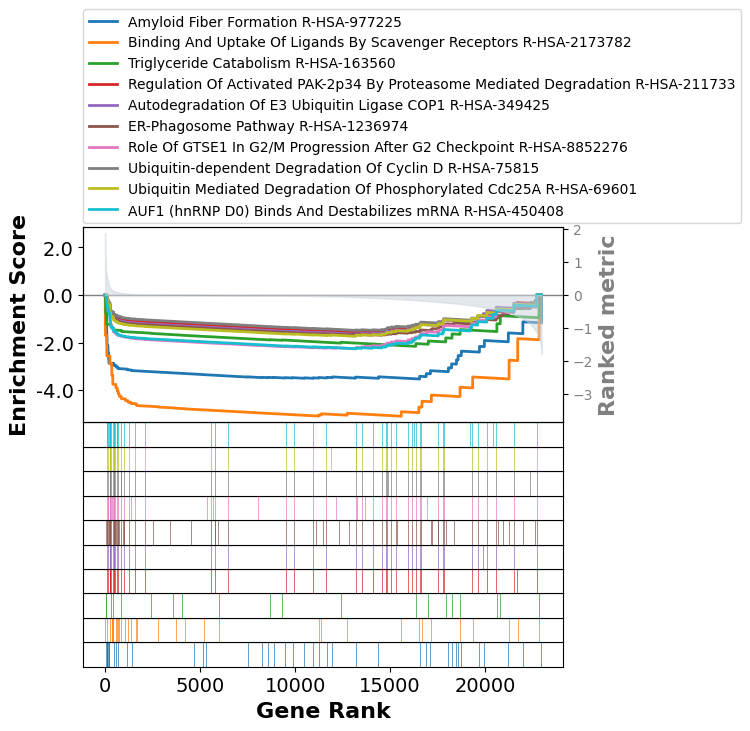

In [45]:
# Extract the gene set names (terms) from the top_terms
top_gene_sets = top_terms['Term'].tolist()

# Plot using the top 20 gene sets (terms)
axs = res.plot(terms=top_gene_sets)

# Show the plot
plt.show()

In [ ]:
prerank = gp.prerank()